<a href="https://colab.research.google.com/github/keirkwame/axionEmu/blob/main/Open_access_version_of_4e5_Planck_2018_3x2pt_analysis_(ma%3D_29).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as sps
import getdist
from tqdm import trange

# checking that we are using a GPU
device = 'gpu:0' if tf.test.is_gpu_available() else 'cpu'
print('using', device, 'device \n')

# # allow memory growth
# gpu = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(device=gpu[0], enable=True)


/home/ian/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
using gpu:0 device 



In [2]:
import affine

In [3]:
import axionEmu

In [4]:
from axionEmu.cosmopower.cosmopower_NN import cosmopower_NN

In [5]:
from axionEmu.cosmopower.cosmopower_PCAplusNN import cosmopower_PCAplusNN

In [6]:
##DM-like axions (m > 5.e-27 eV)

tt_emu_model_ax_dm = cosmopower_NN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/TT_cp_NN_5e5_DM_t2' #TT_lensed_NL_NN_axion'
                               )

te_emu_model_ax_dm = cosmopower_PCAplusNN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/TE_cp_PCAplusNN_5e5_DM_t2' #TE_lensed_NL_NN_axion'
                               )

ee_emu_model_ax_dm = cosmopower_NN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/EE_cp_NN_5e5_DM_t2' #EE_lensed_NL_NN_axion'
                                )

In [7]:
##DE-like axions (m < 5.e-27 eV)

tt_emu_model_ax_de = cosmopower_NN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/TT_cp_NN_5e5_DE_t2'
                               )

te_emu_model_ax_de = cosmopower_PCAplusNN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/TE_cp_PCAplusNN_5e5_DE_t2'
                               )

ee_emu_model_ax_de = cosmopower_NN(restore=True,
                                restore_filename='/home/keir/Software/axionEmu/axion_CMB_models/EE_cp_NN_5e5_DE_t2'
                                )

In [8]:
##m = 1e-25 axion
# path to the tf_planck2018_lite likelihood
from axionEmu.tf_planck2018_lite_mod import tf_planck2018_lite
tf_planck2018_lite_path = '/home/keir/Software/axionEmu/cosmopower/likelihoods/tf_planck2018_lite/'

# parameters of the analysis, and their priors
parameters_and_priors_ax_dm = {'omega_b':      [0.0174, 0.0274, 'uniform'],
                         'omega_cdm':    [0.0003, 0.149, 'uniform'],
                         'h':            [0.55, 0.82,   'uniform'],
                         'tau_reio':     [0.01, 0.26,   'uniform'],
                         'n_s':          [0.86, 1.07,   'uniform'],
                         'ln10A_s': [2.83,  3.4,  'uniform'],
                          'omega_ax': [1e-32, 0.149,  'uniform'],
                         'A_planck':     [1.0,   0.0025,  'gaussian'], 
                          'log10ma': [0.0, 5.699, 'uniform']  # np.log10(1e-32) - np.log10(5.e-27) = ~5.699  
                         }
# fixed_1 = {'log10ma': 3.0, 'omega_ax': 9.794086321726434e-10}
fixed_dm = {}

# instantiation
tf_planck_ax_dm = tf_planck2018_lite(parameters=parameters_and_priors_ax_dm, 
                                  fix_parameters = {},
                                  tf_planck2018_lite_path=tf_planck2018_lite_path,
                                  ee_emu_model=ee_emu_model_ax_dm,
                                  tt_emu_model=tt_emu_model_ax_dm,
                                  te_emu_model=te_emu_model_ax_dm)

FIDUCIAL_1 = np.reshape(np.array([ 0.022242,  0.1197,  0.673,  0.055,  0.9658,  3.0753,  0.05, 1.0080, 1.0]).astype('float32'),(1, 9))
FIDUCIAL_2 = np.reshape(np.array([ 0.022242,  0.1197,  0.673,  0.055,  0.9658,  3.0753,  0.05, 1.0080, 10.0]).astype('float32'),(1, 9))
EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,  1E-2, 1E-4, 1E-3]).astype('float32'), (1,9))
# EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,    1E-4]).astype('float32'), (1,7))

In [9]:
##m = 1e-28 axion
# path to the tf_planck2018_lite likelihood
from axionEmu.tf_planck2018_lite_mod import tf_planck2018_lite
tf_planck2018_lite_path = '/home/keir/Software/axionEmu/cosmopower/likelihoods/tf_planck2018_lite/'

# parameters of the analysis, and their priors
parameters_and_priors_ax_de = {'omega_b':      [0.0174, 0.0274, 'uniform'],
                         'omega_lamda':    [0.16, 0.36, 'uniform'],
                         'h':            [0.55, 0.82,   'uniform'],
                         'tau_reio':     [0.01, 0.26,   'uniform'],
                         'n_s':          [0.86, 1.07,   'uniform'],
                         'ln10A_s': [2.83,  3.4,  'uniform'],
                          #'log10ma': [2.9, 3.1, 'uniform'], #10^32ma(ma in unit of eV)
                          'omega_ax': [1e-32, 0.01,  'uniform'],
                         'A_planck':     [1.0,   0.0025,  'gaussian'], 
                         'log10ma': [5.699, 11.0, 'uniform']   
                         }
# fixed_1 = {'log10ma': 3.0, 'omega_ax': 9.794086321726434e-10}
fixed_de = {}
# instantiation
tf_planck_ax_de = tf_planck2018_lite(parameters=parameters_and_priors_ax_de, 
                                  fix_parameters = {},
                                  tf_planck2018_lite_path=tf_planck2018_lite_path,
                                  ee_emu_model=ee_emu_model_ax_de,
                                  tt_emu_model=tt_emu_model_ax_de,
                                  te_emu_model=te_emu_model_ax_de)
# ##m = 1e-28 axion
# FIDUCIAL_1 = np.reshape(np.array([ 0.022242,  0.3107,  0.673,  0.1,  0.9658,  3.0753,  0.005, 1.0080, 1.0]).astype('float32'), (1, 9))
# FIDUCIAL_2 = np.reshape(np.array([ 0.022242,  0.3107,  0.673,  0.1,  0.9658,  3.0753,  0.005, 1.0080, 9.0]).astype('float32'), (1, 9))
# EPSILON  = np.reshape(np.array([ 1E-4,      1E-3,     1E-2,   1E-3,   1E-3,    1E-3,  1E-3, 1E-4, 1E-4]).astype('float32'), (1,9))
# # EPSILON  = np.reshape(np.array([ 1E-4,      1E-4,     1E-2,   1E-3,   1E-3,    1E-3,    1E-4]).astype('float32'), (1,7))

In [205]:
# #Planck TTTEEE likelihood
# @tf.function
# def log_prob_ax(theta):
#     return tf.squeeze(tf_planck_ax.posterior(theta), -1)



#Planck TTTEEE likelihood
@tf.function
def log_prob_ax(theta, m_a_threshold=5.699, omega_neutrino = 0.0006442):  
    # np.log10(1e-32) - np.log10(5.e-27) = ~5.699 is the threshold to ssitch from the DM to the DE model
    # omega_neutrino = Omega_neutrino * (h ^ 2) = 0.0006442 
    """
    param theta: 1d tensor of cosmological parameters input to the axionEmu neural network, in the following order:
    omega_b:
    omega_CDM/omega_lambda:
    h:
    tau_reio:
    n_s:
    ln10A_s:
    omega_ax:
    A_planck:
    log10ma:
    """
    # note that the DE emulator is trained on omega_lambda, rather tahn omega_CDM for the DM emulator
    # so need to convert omega_CDM to omega_lambda for the DE case
    omega_b, omega_cdm, h, tau_reio, n_s, ln10a_s, omega_ax, a_planck, log10ma = tf.unstack(theta, axis=1)  # unpack the params
    # convert omega_CDM to omega_lambda:
    # Omega_CDM + Omega_lambda + Omega_b + Omega_ax + Omega_neutrino = 1
    # convert omega_cdm, omega_b, omega_ax, omega_neutrino to Omega_cdm, Omega_b, Omega_ax, Omega_neutrino
    # print(omega_to_Omega((omega_cdm, omega_b, omega_ax, tf.fill(tf.shape(omega_ax), omega_neutrino)), h))
    # Omegas = omega_to_Omega((omega_cdm, omega_b, omega_ax, tf.fill(tf.shape(omega_ax), omega_neutrino)), h)
    # tuple
    Omega_cdm, Omega_b, Omega_ax, Omega_neutrino = tf.unstack(omega_to_Omega((omega_cdm, omega_b, omega_ax, 
                                                                              tf.fill(tf.shape(omega_ax), omega_neutrino)), h))
    # print(tf.map_fn(fn=lambda t: t, elems=Omegas))
    # compute Omega_lambda
    Omega_lambda = 1 - Omega_cdm - Omega_b - Omega_ax - Omega_neutrino
    # convert Omega_lambda to omega_lambda
    omega_lambda = Omega_to_omega(Omega_lambda, h)
    # create new tensor de_theta but with omega_lambda in place of omega_cdm, to use for the de emulator
    # print(omega_b, omega_lambda, h, tau_reio, n_s, ln10a_s, omega_ax, a_planck, log10ma)
    de_theta = tf.stack([omega_b, omega_lambda, h, tau_reio, n_s, ln10a_s, omega_ax, a_planck, log10ma], axis=1)

    # if greater than the threshold, then axion behaves like DM, otherwise it behaves like DE
    x = log10ma > m_a_threshold
    # apply dm model to theta if greater than, otherwise apply de model to the DE theta param
    # print(tf.squeeze(tf_planck_ax_dm.posterior(theta), -1))
    # print(tf.squeeze(tf_planck_ax_de.posterior(de_theta), -1))
    # return tf.cond(x, lambda: tf.squeeze(tf_planck_ax_dm.posterior(theta), -1), lambda: tf.squeeze(tf_planck_ax_de.posterior(de_theta), -1))
    
    
    # return tf.where(condition=x, x=tf.squeeze(tf_planck_ax_dm.posterior(theta), -1), y=tf.squeeze(tf_planck_ax_de.posterior(de_theta), -1))
    return tf.squeeze(tf_planck_ax_dm.posterior(theta), -1)

def omega_to_Omega(omega_i, h):
    """
    converts omega_i to Omega_i
    """
    return omega_i/(h ** 2)

def Omega_to_omega(Omega_i, h):
    """
    converts Omega_i to omega_i
    """
    return Omega_i * (h ** 2)

In [206]:
current_state_ax[0][0], tf_planck_ax_de.parameters

(<tf.Tensor: shape=(9,), dtype=float32, numpy=
 array([0.02221851, 0.11963884, 0.6583001 , 0.05572915, 0.9645907 ,
        3.0756326 , 0.03916566, 1.0080559 , 1.0015559 ], dtype=float32)>,
 {'omega_b': [0.0174, 0.0274, 'uniform'],
  'omega_lamda': [0.16, 0.36, 'uniform'],
  'h': [0.55, 0.82, 'uniform'],
  'tau_reio': [0.01, 0.26, 'uniform'],
  'n_s': [0.86, 1.07, 'uniform'],
  'ln10A_s': [2.83, 3.4, 'uniform'],
  'omega_ax': [1e-32, 0.01, 'uniform'],
  'A_planck': [1.0, 0.0025, 'gaussian'],
  'log10ma': [5.699, 11.0, 'uniform']})

In [207]:
tf_planck_ax_de.parameter_keys

['omega_b',
 'omega_lamda',
 'h',
 'tau_reio',
 'n_s',
 'ln10A_s',
 'omega_ax',
 'A_planck',
 'log10ma']

In [208]:
# error!

# tf_planck_ax_de.posterior(current_state_ax[0][0])

In [209]:
# error!

# log_prob_ax(current_state_ax[0][0])

where Omega_i = omega_i / (h ^2) 

omega_neutrino = Omega_neutino * (h ^ 2) = 0.0006442 

but tau_reion should be defined the same?

Omega_CDM + Omega_lambda + Omega_baryon + Omega_axion + Omega_neutrino = 1

In [210]:
# number of parameters (same for both)
n_params_ax = len(parameters_and_priors_ax_dm)

# number of walkers (note you'll end up with a total of 2*n_walkers for this parallel variant of the affine sampler)
n_walkers = 50

# initialize walkers and current state
walkers1_ax = tf.concat((tf.random.normal([n_walkers//2, n_params_ax], FIDUCIAL_1, EPSILON), tf.random.normal([n_walkers//2, n_params_ax], FIDUCIAL_2, EPSILON)), axis=0)
walkers2_ax = tf.concat((tf.random.normal([n_walkers//2, n_params_ax], FIDUCIAL_1, EPSILON), tf.random.normal([n_walkers//2, n_params_ax], FIDUCIAL_2, EPSILON)), axis=0)
current_state_ax = [walkers1_ax, walkers2_ax]

In [211]:
# number of MCMC steps to take (you'll end up with an MCMC chain with shape (n_steps, 2*n_walkers, n_parameters))
n_steps = 5000

# run the sampler
with tf.device(device):
    chain_ax = affine.affine_sample(log_prob_ax, n_steps, current_state_ax, args=[])

100%|██████████| 4999/4999 [00:56<00:00, 88.71it/s] 


In [212]:
burnin_steps = 200
samples_ax = chain_ax.numpy()[burnin_steps:,:,:].reshape((-1, n_params_ax)) #.numpy() #n_params_ax


In [213]:
import emcee
auto = []
for i in np.linspace(100, 15500, 155):
  auto_time = np.mean(emcee.autocorr.integrated_time(chain_ax.numpy()[:int(i)], tol=0))
  auto.append(auto_time)

/home/ian/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  
/home/ian/.local/lib/python3.8/site-packages/emcee/autocorr.py:37: RuntimeWarning: invalid value encountered in multiply
  acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real


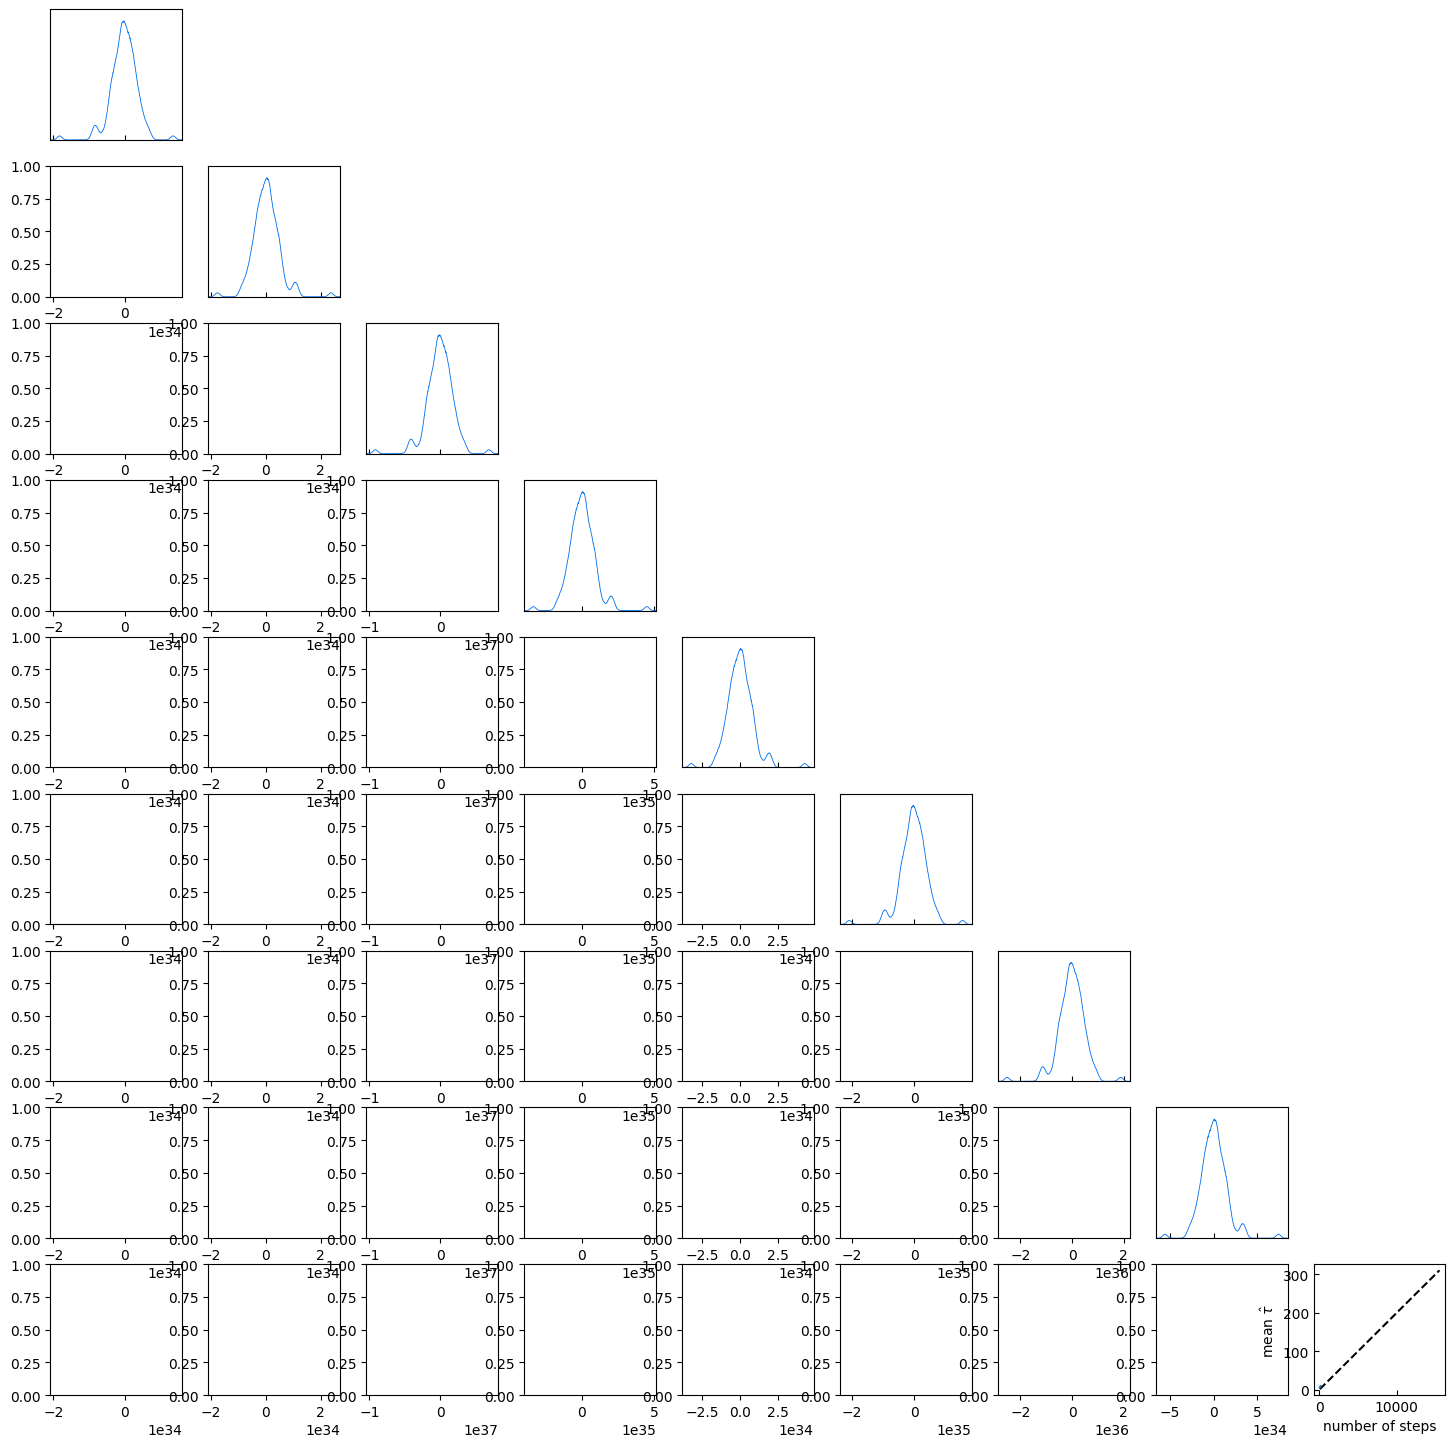

In [214]:
import matplotlib.pyplot as plt
n = np.linspace(100, 15500, 155)
y = auto
plt.plot(n, n / 50.0, "--k")
plt.plot(n, y)
# plt.xlim(0, n.max())
# plt.ylim(0, y.max() + 0.1 * (y.max() - y.min()))
plt.xlabel("number of steps")
plt.ylabel(r"mean $\hat{\tau}$")
plt.show()

In [215]:
##m = 1e-25 axion
from getdist import plots, MCSamples
names = [r"\omega_{\mathrm{b}}", 
         r"\omega_{\mathrm{cdm}}", 
         r"h", 
         r"\tau",
         r"n_s", 
         r"ln 10^{10} A_s",
         #r"log 10^{32} ma",
         r"\omega_{\mathrm{ax}}",
         r"A_{planck}", 
        r"log10ma"]
labels = names
# mcsamples = MCSamples(samples=samples_test, names = names, labels = labels)
mcsamples_ax = MCSamples(samples=samples_ax,names = names, labels = labels)
g = plots.get_subplot_plotter()
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 30
g.settings.legend_fontsize = 25

Removed no burn in


/home/ian/.local/lib/python3.8/site-packages/getdist/chains.py:406: RuntimeWarning: overflow encountered in square
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm


In [216]:
##m = 1e-25 axion
mcsamples_ax.updateSettings({'contours': [0.68, 0.95, 0.99]})
g.triangle_plot([mcsamples_ax], filled=True, shaded=True,legend_labels=[r'$m_a = 10^{-25}$ eV'])
# plt.savefig('../planck_results_fixed_mass.png')
plt.show()

/home/ian/.local/lib/python3.8/site-packages/getdist/chains.py:680: RuntimeWarning: overflow encountered in square
  return np.dot(self.mean_diff(paramVec) ** 2, self.weights) / self.get_norm()
/home/ian/.local/lib/python3.8/site-packages/getdist/chains.py:512: RuntimeWarning: overflow encountered in square
  diff2 = (d[:-k] - d[k:]) ** 2 / kernel_std ** 2
/home/ian/.local/lib/python3.8/site-packages/getdist/chains.py:530: RuntimeWarning: overflow encountered in square
  return np.dot(np.exp(-(d[:-_k] - d[_k:]) ** 2 / (4 * kernel_std ** 2)) * self.weights[:-_k],
/home/ian/.local/lib/python3.8/site-packages/getdist/chains.py:680: RuntimeWarning: overflow encountered in square
  return np.dot(self.mean_diff(paramVec) ** 2, self.weights) / self.get_norm()
/home/ian/.local/lib/python3.8/site-packages/getdist/chains.py:512: RuntimeWarning: overflow encountered in square
  diff2 = (d[:-k] - d[k:]) ** 2 / kernel_std ** 2
/home/ian/.local/lib/python3.8/site-packages/getdist/chains.py:530: Runt

ValueError: 'list' argument must have no negative elements